# 📘 FP-Growth on Grocery Store Dataset

## 🧠 FP-Growth Algorithm on Market Basket Data

In this notebook, we apply the **FP-Growth algorithm** to identify frequent itemsets and generate association rules from a grocery store transaction dataset.

### Steps Covered:
1. Load and preview the dataset
2. Preprocess transactions
3. Convert data to a one-hot encoded format
4. Apply FP-Growth
5. Extract association rules
6. Visualize and interpret the results

🔍 Objective: Discover relationships such as *"If a customer buys bread, they're likely to also buy milk."*

In [1]:
# 📦 Step 1: Import libraries
import os 
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth
import matplotlib.pyplot as plt

In [2]:
# 📄 Step 2: Define transactions

base_dir = os.path.abspath(os.path.join(os.getcwd(),"..", "..", "..", "data", "02_Unsupervised_Learning", "03_Association_Rules"))
file_path = os.path.join(base_dir, "GroceryStoreDataSet.csv")
df = pd.read_csv(file_path , header=None)
transactions = df[0].apply(lambda x: x.split(',')).tolist()
transactions

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [3]:
# STEP 3: One-hot encoding using TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

df_encoded.head()

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True


In [4]:
# STEP 4: Apply FP-Growth to find frequent itemsets
frequent_itemsets = fpgrowth(df_encoded, min_support=0.2, use_colnames=True)
frequent_itemsets.sort_values(by="support", ascending=False).head(10)

,support,itemsets
0,0.65,(BREAD)
7,0.40,(COFFEE)
4,0.35,(TEA)
1,0.35,(BISCUIT)
3,0.30,(CORNFLAKES)
8,0.30,(SUGER)
6,0.25,(MAGGI)
2,0.25,(MILK)
5,0.20,(BOURNVITA)
9,0.20,"(BREAD, BISCUIT)"


In [5]:
# STEP 5: Generate association rules from frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules.sort_values(by="confidence", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(MILK),(BREAD),0.25,0.65,0.2,0.800000,1.230769,1.0,0.0375,1.75,0.250000,0.285714,0.428571,0.553846
2,(MAGGI),(TEA),0.25,0.35,0.2,0.800000,2.285714,1.0,0.1125,3.25,0.750000,0.500000,0.692308,0.685714
1,(CORNFLAKES),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,1.0,0.0800,1.80,0.571429,0.400000,0.444444,0.583333
3,(SUGER),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,1.0,0.0800,1.80,0.571429,0.400000,0.444444,0.583333
4,(SUGER),(BREAD),0.30,0.65,0.2,0.666667,1.025641,1.0,0.0050,1.05,0.035714,0.266667,0.047619,0.487179


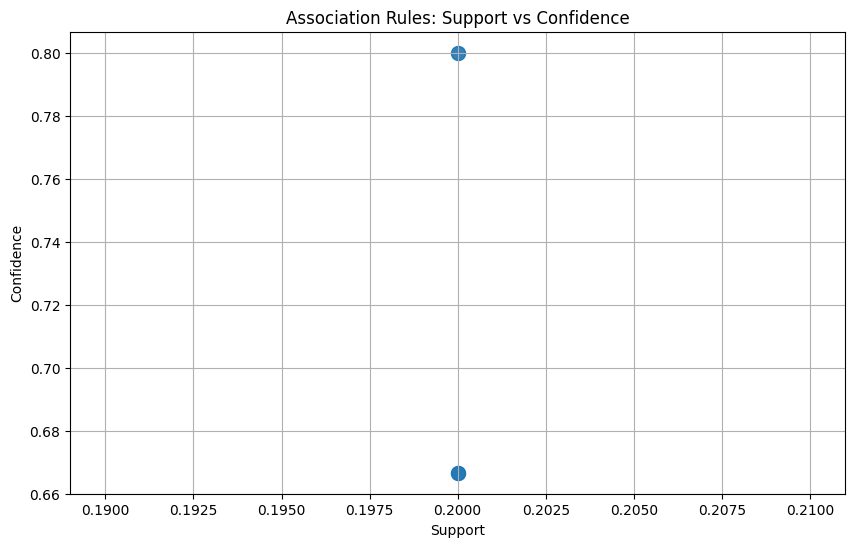

In [8]:
# STEP 6: Visualize top rules

rules.plot(kind='scatter', x='support', y='confidence', alpha=0.7, s=100, figsize=(10,6))
plt.title("Association Rules: Support vs Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.grid(True)
plt.show()
